# Visa Applications Project - Ensemble Techniques

### Context:

This dataset contains information from employers and employees that have either been certified or denied VISAs by the Office of Foreign Labor Certification (OFLC) in order to be employed in the US. In 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.


### Objective:

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. The data will be analyzed and a classification model will be used to facilitate the process of visa approvals. The results will be used to recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the factors that significantly influence the case status. 

### Data Dictionary
* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

# Importing libraries/data

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import (
    BaggingRegressor,
    RandomForestRegressor, 
    GradientBoostingRegressor, 
    AdaBoostRegressor, 
    StackingRegressor)
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier, 
    StackingClassifier)

from xgboost import XGBRegressor
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score)
from sklearn.model_selection import GridSearchCV, train_test_split

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

from sklearn.model_selection import GridSearchCV

In [2]:
Visa_data=pd.read_csv("EasyVisa.csv")

In [3]:
data = Visa_data.copy()

In [4]:
data.shape

(25480, 12)

- The dataset contains 25,480 rows with 12 columns. 

In [5]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [8]:
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [9]:
data[data.duplicated()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [10]:
print("List of column names:", data.columns)

List of column names: Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')


Insights: 
- There are 25,480 rows (employees) with 12 columns (variables). 
- The final column, "case_status", is our dependent (target) variable. 
- Within the dataset, there are 9 "object" type columns, 1 "float" type column, and 2 "integer" type columns. 
- There are no missing/null values within the dataset. There are also no duplicate values present. 
- The "case_id" column will be dropped as it is used for identification purposes and should not be included in the analysis as it would not provide us with any valuable information. 

In [11]:
#dropping "case_id" column
data = data.drop(["case_id"], axis=1)

In [12]:
data.head(2)

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


- case_id column was successfully dropped. 

# Exploratory Data Analysis (EDA)

<b>Leading Questions:</b>
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?
2. How does the visa status vary across different continents?
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [13]:
data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


Insights:
- The 5 point statistical summary for the 3 numerical columns (of integer and float types) was calculated. 
    - Within the table, the following were calculated for each variable: total count of values, the mean (average), standard deviation, the smallest value (min), the 1st/2nd/3rd quantile values, and the largest values (max).
- yr_of_estab variable contains year values so the summary statistics are not as valuable for analysis. 
- The minimum number of employees is a negative value (-26). The number of employees at a company realistically cannot be a negative value so the negative values in this column will be fixed. 

In [14]:
# fixing the negative values within the no_of_employees variable 
data["no_of_employees"] = np.abs(data["no_of_employees"])

In [15]:
data["no_of_employees"].min()

11

- Minimum value of the no_of_employees column is now 11 (positive) instead of a negative value (-26). 

In [16]:
# overall counts of each unique value within the categorical variables:
categorical_columns = list(data.select_dtypes("object").columns)

for column in categorical_columns:
    print(data[column].value_counts())
    print("-"*50)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
--------------------------------------------------
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
--------------------------------------------------
Y    22773
N     2707
Name: full_time_position, dty

## Univariate Analysis

In [17]:
#histogram and boxplot function - numerical data

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"purple", 
                       "markeredgecolor":"purple",
                      "markersize":"7"}, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="violet", linestyle="-"
    )  # Add median to the histogram

The function above will be used for analysis of numerical variables: 
- no_of_employees
- yr_of_estab
- prevailing_wage

In [18]:
#labeled barplot function - categorical data

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", 
                       order=data[feature].value_counts().index[:n].sort_values())
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, 
                    xytext=(0, 5), textcoords="offset points")  # annotate the percentage
        plt.xticks(rotation = 60) #rotates the x-axis labels by 60 degrees
    plt.show()  # shows the plot

The function above will be used for analysis of categorical variables: 
- case_id
- continent
- education_of_employee
- has_job_experience
- requires_job_training
- region_of_employment
- unit_of_wage
- full_time_position
- case_status

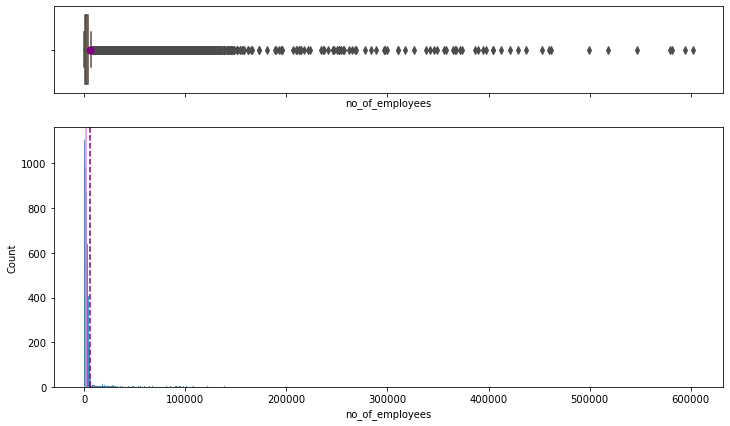

In [19]:
histogram_boxplot(data, "no_of_employees")

- A huge majority of companies in this dataset have less than 100,000 employees. 
- The histogram is very right-skewed. The figure is heavily influenced by the incredibly high maximum values of companies that are larger than 500,000 employees. 
- According to the 5 point summary, the average number of employees is approximately 5667 people. The median number of employees is just below the average. 
- There are many company sizes that are flagged as outliers by the boxplot, which are to be expected for very skewed-distributions like this. 

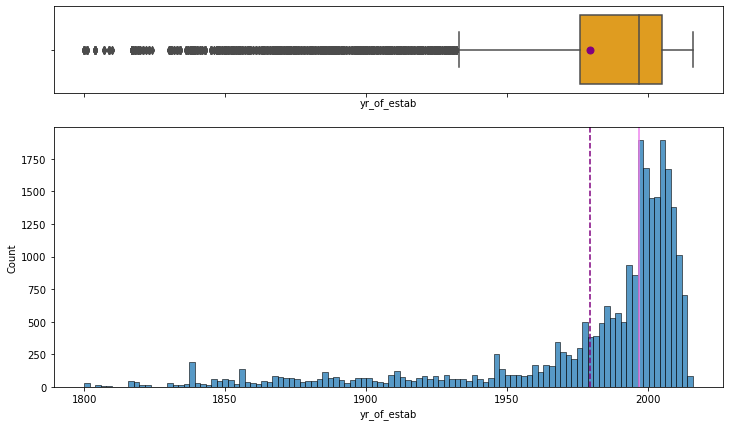

In [20]:
histogram_boxplot(data, "yr_of_estab")

- A huge majority of companies in this dataset were established just before the year 2000. 
- The histogram is very left-skewed. The figure is heavily influenced by the low minimum values which represent companies that have been in existence as long as the 1800s. 
- The average year of establishment between all of the companies in the dataset is 1979. The median year of establishment is in the late 1990s. 
- There are many company establishment years that are flagged as outliers by the boxplot, which is to be expected for very skewed-distributions. 

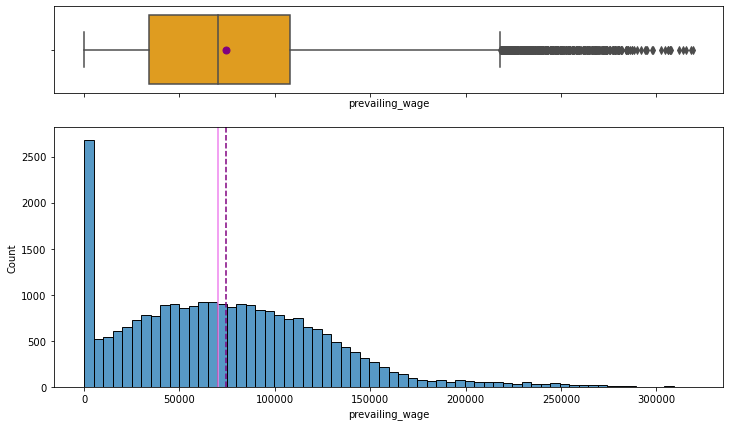

In [21]:
histogram_boxplot(data, "prevailing_wage")

In [22]:
#checking the observations that have low prevailing wage
data.loc[data['prevailing_wage'] <100]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
338,Asia,Bachelor's,Y,N,2114,2012,Northeast,15.7716,Hour,Y,Certified
634,Asia,Master's,N,N,834,1977,Northeast,3.3188,Hour,Y,Denied
839,Asia,High School,Y,N,4537,1999,West,61.1329,Hour,Y,Denied
876,South America,Bachelor's,Y,N,731,2004,Northeast,82.0029,Hour,Y,Denied
995,Asia,Master's,N,N,302,2000,South,47.4872,Hour,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...
25023,Asia,Bachelor's,N,Y,3200,1994,South,94.1546,Hour,Y,Denied
25258,Asia,Bachelor's,Y,N,3659,1997,South,79.1099,Hour,Y,Denied
25308,North America,Master's,N,N,82953,1977,Northeast,42.7705,Hour,Y,Denied
25329,Africa,Bachelor's,N,N,2172,1993,Northeast,32.9286,Hour,Y,Denied


In [23]:
data.loc[data['prevailing_wage'] <100, "unit_of_wage"].value_counts()

Hour    176
Name: unit_of_wage, dtype: int64

- A large number of employees appear to have abnormally low wages (below 100 dollars). This is because the prevailing wage variable includes employees that are paid hourly, weekly, and yearly (salaried). An hourly rate of 15.75 an hour appears as 15.75 on the figure instead of an overall yearly wage. While a yearly wage of over 30,000 appears as 30,000 on the figure. This make it appear that many employees are being paid less than 100 dollars for their work while some are being paid tens of thousands of dollars. 
    - The wages that are under 100 are all hourly employees while those that are over 100 are salaried employees.
- The average and median wages both fall around 70,000 dollars. 
- The distribution of wages is right-skewed due to the very high maximums and very low minimum values. 
    - Because of this, many of the high salaries are flagged as outliers by the boxplot.

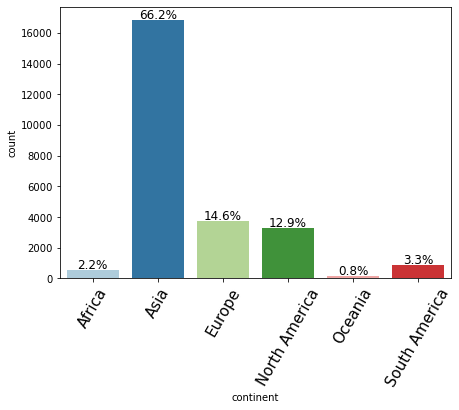

In [24]:
labeled_barplot(data, "continent", perc=True)

- The largest majority of employees (66.2%) across the companies are in Asia. 
- The second most prevalent continent in which employees are from is Europe, followed by North America. 
- Africa, South America, and Oceania make up less than 7% of all employees in the dataset combined. 

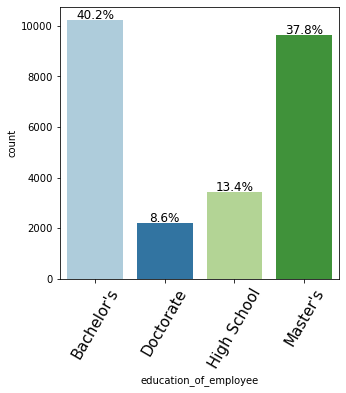

In [25]:
labeled_barplot(data, "education_of_employee", perc=True)

- A majority (40.2%) of employees hold at most a Bachelor's degree. 
- 37.8% hold a master's degree. 
- The highest education level (Doctorate) is only held by 8.6% of employees. 
- 13.4% of employees in the dataset hold a high school education only. 

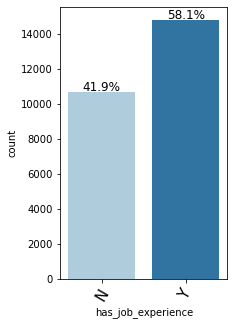

In [26]:
labeled_barplot(data, "has_job_experience", perc=True)

- More than half (58.1%) of employees in the dataset have previous job experience while the other 41.9% do not. 

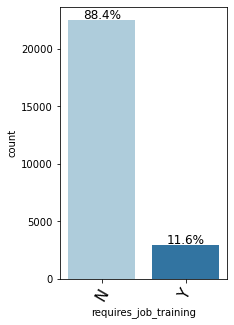

In [27]:
labeled_barplot(data, "requires_job_training", perc=True)

- 88.4% of employees do not require job training while only 11.6% do. 

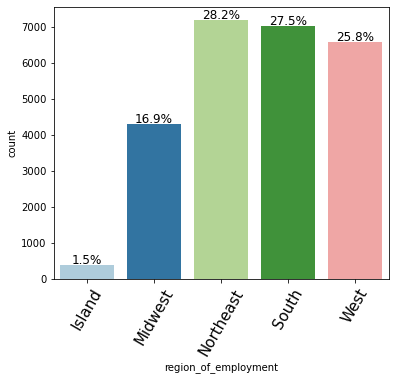

In [28]:
labeled_barplot(data, "region_of_employment", perc=True)

- The region with the highest proportion of employees within the dataset is the Northeastern United States with 28.2%. 
- This is very closely followed by the Southern US (with 27.5%) then the Western US with 25.8%. 
- The midwest makes up the 2nd smallest proportion of employees in the dataset, followed by the islands of the US. 

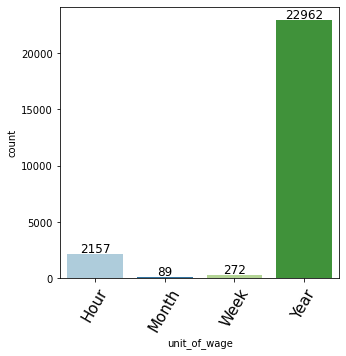

In [29]:
labeled_barplot(data, "unit_of_wage")

- A huge majority of employees within our dataset are paid yearly compared to other intervals (hourly, monthly, and weekly). 

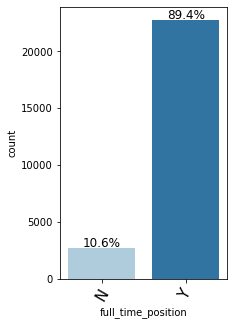

In [30]:
labeled_barplot(data, "full_time_position", perc=True)

- Almost 90% (89.4%) of jobs within the dataset are full time. 10.6% are not-full time. 

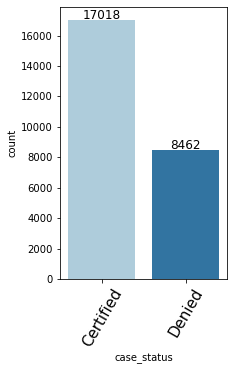

In [31]:
labeled_barplot(data, "case_status")

- Overall, a majority employees within the dataset have visas that were certified. Approximately two times has many visas were certified compared to denied. 

## Bivariate Analysis

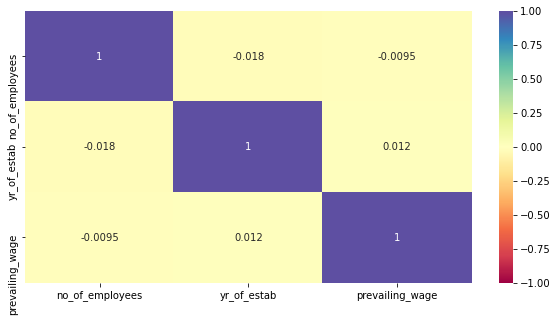

In [32]:
#correlation heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

- There is no significant cases of high correlation noted among variables observed. 


In [33]:
#stacked barplot function - categorical data vs dependent variable

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [34]:
#function to plot distributions wrt target - numerical data vs dependent variable

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


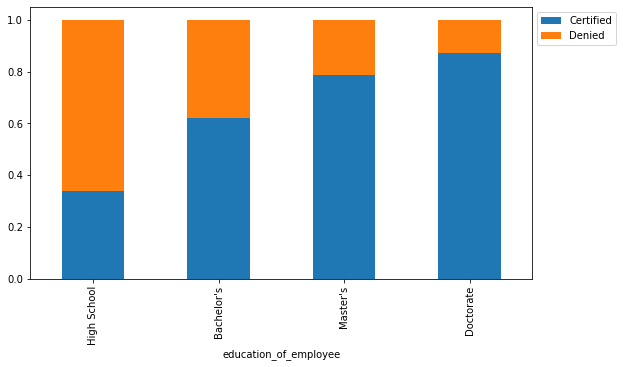

In [35]:
stacked_barplot(data, "education_of_employee", "case_status")

<b>Leading Question 1 - Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?</b>
- As education level becomes more advanced, more and more employees are certified for their Visa. 
    - Only a small minority of employees with a Doctorate degree are denied Visas. 
    - Oppositely, less than half of employees that have a high school education as their highest level of education are certified for their Visas. 
- This indicates that education level may play a big role in denial or certification of the Visa. 

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


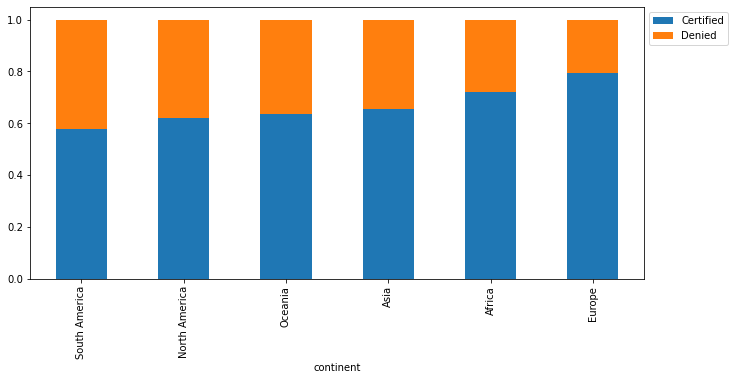

In [36]:
stacked_barplot(data, "continent", "case_status")

<b>Leading Question 2 - How does the visa status vary across different continents?</b>
- European employees have the lowest proportion of visas that are denied, followed by African and Asian employees, respectively. 
- South American employees have the highest proportion of visas that are denied, followed by North American and Oceanian employees, respectively. 
- Every region has greater than 50% of employees with visa certifications. 

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


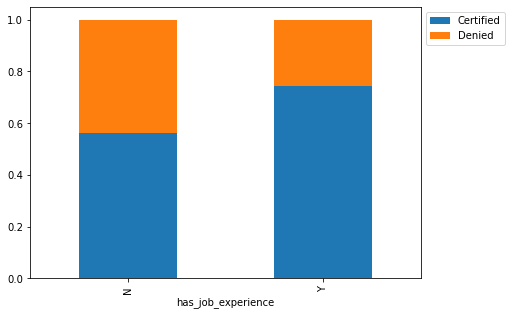

In [37]:
stacked_barplot(data, "has_job_experience", "case_status")

<b>Leading Question 3 - Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?</b>
- Employees with job experience have a higher proportion of certified visas compared to employees without job experience. 

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


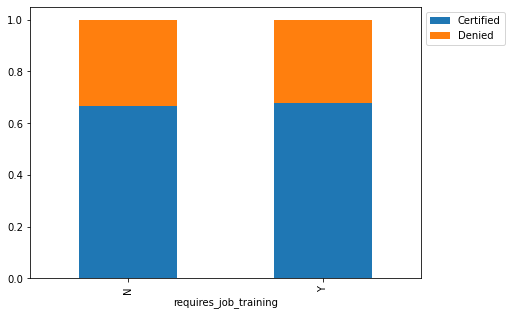

In [38]:
stacked_barplot(data, "requires_job_training", "case_status")

- It appears that almost an equivalent proportion of employees are certfied and denied visas for both employees that require job training and those that do not. 

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


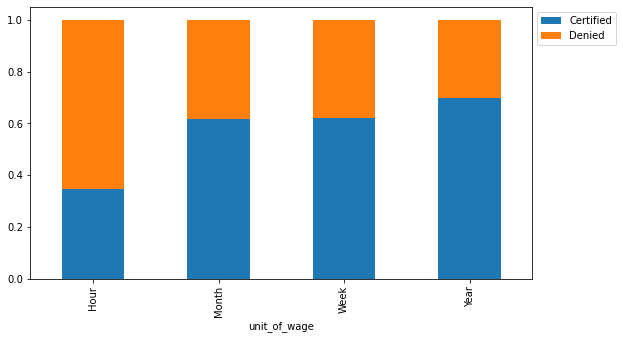

In [39]:
stacked_barplot(data, "unit_of_wage", "case_status")

<b> Leading Question 4 - In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?</b>
- Hourly employees have the highest proportion of visa denials. 
- Employees that are paid yearly (salaried) have the lowest proportion of visa denials. 
    - These employees are the most likely to be certified for visas. 

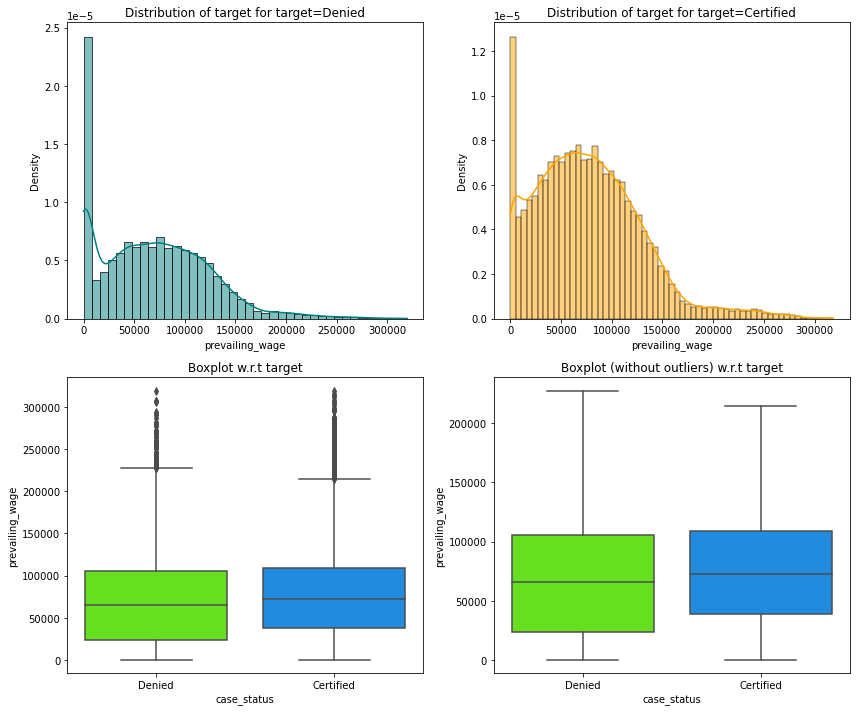

In [40]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

<b>Leading Question 5 - The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?</b>
- The average prevailing wage is observed to be slightly higher for certified visa employees compared to employees with visa denials. 
- This means that as the prevailing wage increases, the likelihood of the visa being certified increases. 
- The difference between wages and certified/denied visas is not very dramatic though. Many employees with high wages are denied visas while many lower paid employees are approved for visas. 
- Prevailing wage likely plays a role in the likelihood of being certified but it does not appear to be the only factor that is important. 

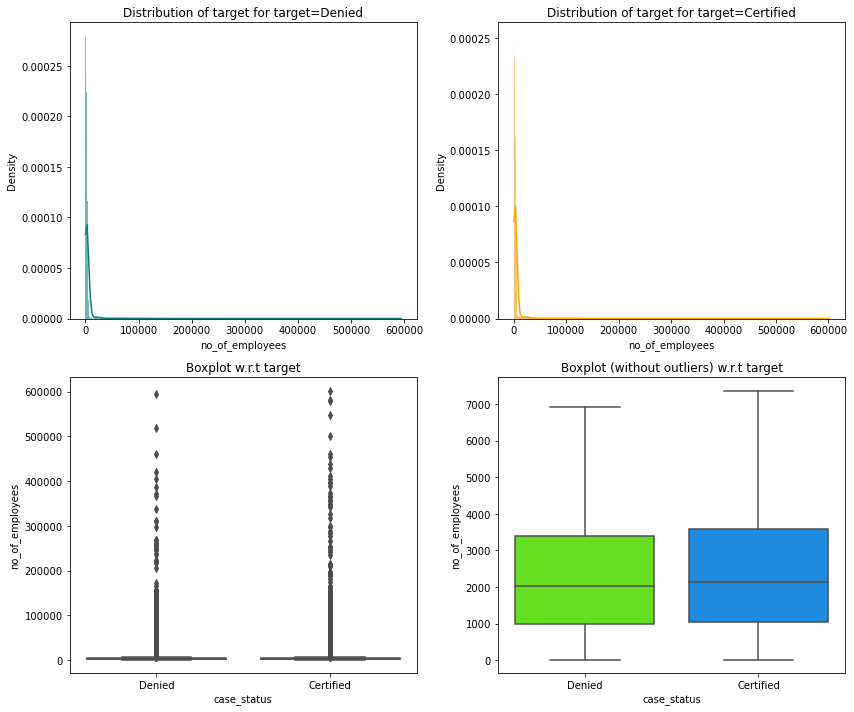

In [41]:
distribution_plot_wrt_target(data, "no_of_employees", "case_status")

- It appears that there is an equal amount of visas that are denies and certified for the range of company sizes. There are some small companies that have certified a visa for their employee. There are also some very large companies that have had visa denials. 
- Based on these figures, it seems like the size of the company does not play a very important role in the likelihood of the employees visa being certified or denied. 

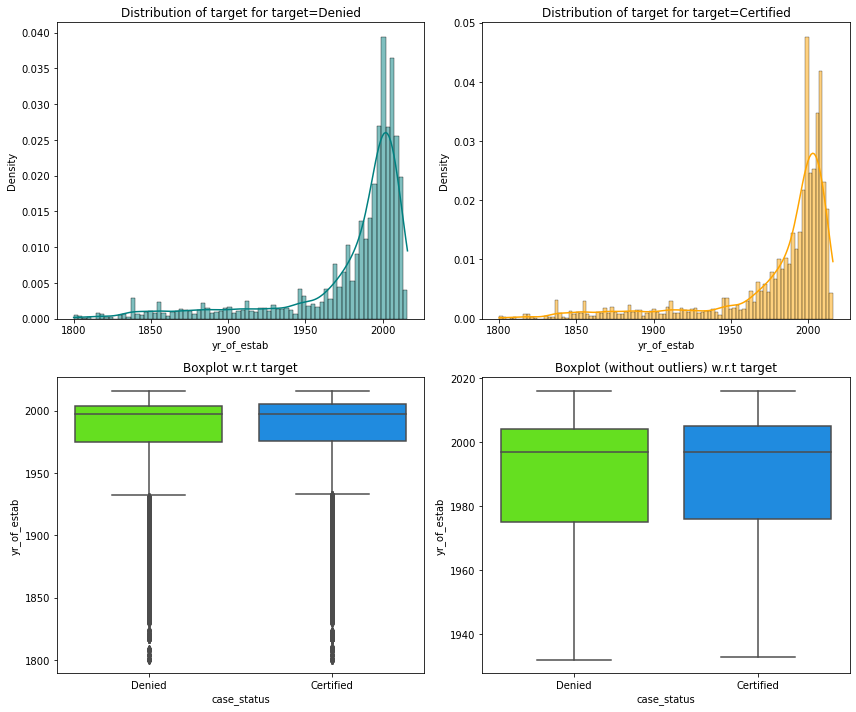

In [42]:
distribution_plot_wrt_target(data, "yr_of_estab", "case_status")

- Year of establishment of the company also does not appear to play a huge role of whether a visa is certified or denied. 
- Denials and certifications of visas were occurring at the same amount for companies across the entire range of ages. 

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


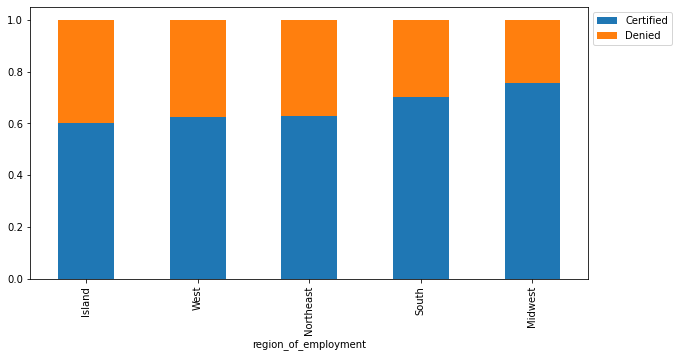

In [43]:
stacked_barplot(data, "region_of_employment", "case_status")

- Employees in the midwest have the highest proportion of visa certifications compared to any other region. The midwest is closely followed by the South. 
- The Northeast and the west have approximately the same proportion of employees that have their visas certified. 
- The US Islands have the highest proportion of employees that are denied visas. 

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


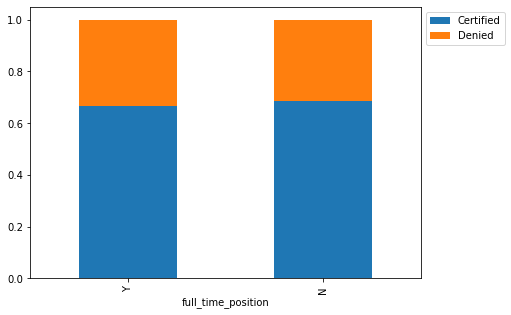

In [44]:
stacked_barplot(data, "full_time_position", "case_status")

- The proportion of visa certifications and denials is approximately the same between full time employees and non-full time employees. 

# Data Preprocessing
- Outlier check
- Data cleaning

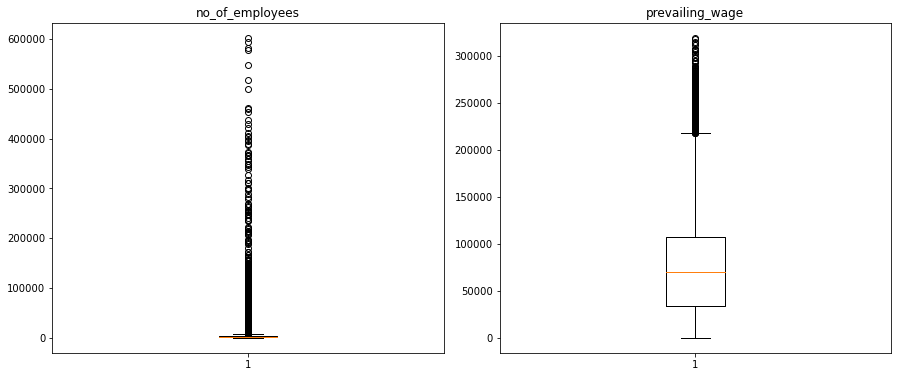

In [45]:
# outlier detection using boxplots
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# dropping yr_of_estab as it is a temporal numerical variable
numeric_columns.remove("yr_of_estab")

plt.figure(figsize=(25, 20))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- The no_of_employees columns has multiple outliers that are flagged by the boxplot. Within the histogram for this variables (produced earlier), we can see that these outliers really are not inconsisent with the overall distribution of the data and are not of any concern.

Data Cleaning:
- case_id variable is an identification variable. Therfore it was dropped from the dataset earlier on.
- Negative values in the no_of_employees variable were treated and fixed earlier as well. 

# Data Preparation For Modeling
1. Encoding the case_status variable from "certified" and "denied" to 1 and 0, respectively. 
2. Categorical variables will be encoded using dummies.
3. Data will be split into training and testing data to build and evaluate models. 

### Encoding - case_status

In [46]:
#Encoding case_status variable using a lambda function
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)
data["case_status"].value_counts()

1    17018
0     8462
Name: case_status, dtype: int64

### Defining the independent and dependent (target) variables

In [47]:
#separating out the features from the target column
X = data.drop('case_status', axis=1)
y = data['case_status']

### Encoding - dummy variables

In [48]:
#confirming the data types to of the columns to check for the categorical variables
data.dtypes

continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status                int64
dtype: object

In [49]:
cat_columns = data.select_dtypes(include = ["object"]).columns.tolist()
print("The following columns will need to be converted to dummy variables: ", cat_columns)

The following columns will need to be converted to dummy variables:  ['continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position']


In [50]:
#Creating dummy variables for the object type columns
X = pd.get_dummies(X, columns=cat_columns, drop_first=True)
X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1


### Splitting the data into train and test sets

In [51]:
#splitting to train and test using train_test_split with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [52]:
X_train.shape, X_test.shape

((17836, 21), (7644, 21))

- There are 17,836 observations in the train set and 7,644 observations in the test set. 

# Building Bagging and Boosting Models
1. Model Building - Bagging
    - Decision tree
    - Bagging classifier
    - Random forest
2. Model Improvement - Bagging
    - Determining model performance before and after tuning
3. Model Building - Boosting
    - AdaBoost
    - GradientBoost
    - XGBoost
5. Model Improvement - Boosting
    - Determining model performance before and after tuning
6. Model Building - Stacking Model 

### Model evaluation criterion
#### Incorrect decisions that the models can make:
1. Model predicts that the visa application will get certified when it indeed was denied. 
2. Model predicts that the visa application will not get certified when in reality the visa application will get certified. 

#### Is one case more important than the other? 
Both cases are equally as important:
- If a visa is certified when it should have been denied, an employee that should not have a visa will work in a position over an employee that either: was more deserving of a visa, or did not need a visa at all. 
- If a visa is denied that should have been certified, a valuable employee to a company would not be able to work in that position. 

#### How can these losses be reduced? 
- F1 score (also known as the F-measure or F-score) will be used as the metric for evaluation of the model. The greater the F1 score, the higher the chances to minimize false negatives and false positives. 
- Balanced class weights will be used to make both classes focused on equally. 

In [53]:
#defining the function to compute the different metrics to check the performance of a classification model
#model_performance_classification_sklearn will be shortened to "mpcsl" for simplicity
def mpcsl(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0])

    return df_perf

In [54]:
#defining the function to plot a confusion matrix (with percentages)
#confusion_matrix_sklearn will be shortened to "confusion" for simplicity
def confusion(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()]).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# Bagging

## Decision Tree Model

In [55]:
dtree = DecisionTreeRegressor(random_state=1)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

#### Checking performance of the model on the training and test sets 

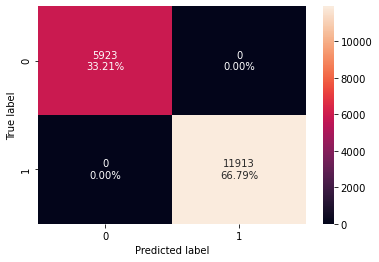

In [56]:
#confusion matrix for the decision tree on the training set
confusion(dtree, X_train, y_train)

In [57]:
#performance on training set
dtree_perf_train = mpcsl(dtree, X_train, y_train)
print("Training set performance: \n", dtree_perf_train)

Training set performance: 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


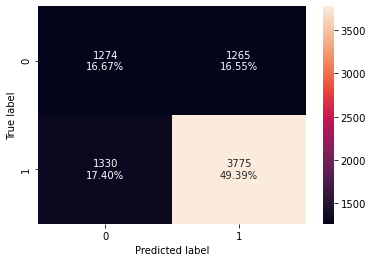

In [58]:
#confusion matrix for the decision tree on the test set
confusion(dtree, X_test, y_test)

In [59]:
#performance on test set
dtree_perf_test = mpcsl(dtree, X_test, y_test)
print("Test set performance: \n", dtree_perf_test)

Test set performance: 
    Accuracy    Recall  Precision        F1
0  0.660518  0.739471   0.749008  0.744209


- The decision tree model with the default parameters is very overfit to the training data. 
- The performance of the model on the test data isn't terrible. Hyperparameter tuning will be attempted to reduce overfitting and improve performance on the train and test sets. 

#### Hyperparameter tuning - decision tree model
- max depth, min samples leaf, max samples leaf, and min impurity decrease

In [60]:
#choosing the type of classifier to use
dtree_tuned = DecisionTreeClassifier(class_weight = "balanced", random_state = 1)

#Parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5), 
    "min_samples_leaf": [3, 5, 7], 
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001]}

#defining the scorer to use to compare parameters above by f1 score
scorer = metrics.make_scorer(metrics.f1_score)

#running the grid search using GridSearchCV
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#setting the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

#fitting the best algorithm to the data (using the train set)
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

#### Checking performance of the model on the training and test sets (after hyperparameter tuning) 

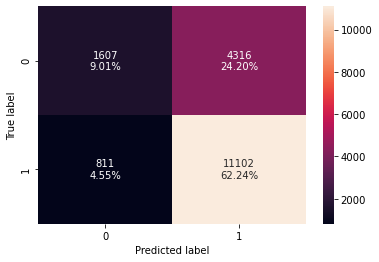

In [61]:
#confusion matrix on train data on tuned decision tree 
confusion(dtree_tuned, X_train, y_train)

In [62]:
#performance of tuned tree on training set
dtree_tuned_perf_train = mpcsl(dtree_tuned, X_train, y_train)
print("Training set performance: \n", dtree_tuned_perf_train)

Training set performance: 
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


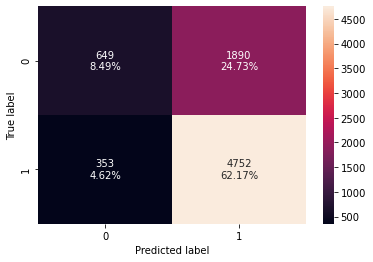

In [63]:
#confusion matrix on test data on tuned decision tree 
confusion(dtree_tuned, X_test, y_test)

In [64]:
#performance of tuned tree on test set
dtree_tuned_perf_test = mpcsl(dtree_tuned, X_test, y_test)
print("Test set performance: \n", dtree_tuned_perf_test)

Test set performance: 
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


- The overfitting is reduced after tuning of the hyperparameters. The f1 score of the test set has improved from 74.42% with the non-tuned tree to 80.91% with the tuned tree. 
- The model is overall generalizing better than the original decision tree model with default parameters. 

## Bagging Classifier

In [65]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

#### Checking performance of the model on the training and test sets 

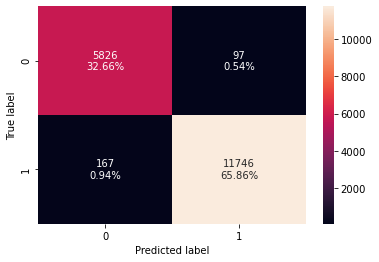

In [66]:
#confusion matrix for the bagging classifier on the training set
confusion(bagging_classifier, X_train, y_train)

In [67]:
#performance of the bagging classifier on training set
bagging_classifier_perf_train = mpcsl(bagging_classifier, X_train, y_train)
print("Training set performance: \n", bagging_classifier_perf_train)

Training set performance: 
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


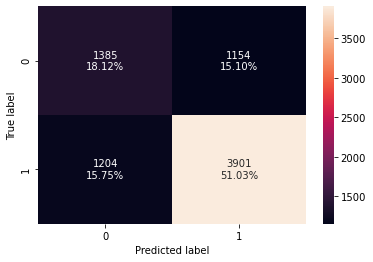

In [68]:
#confusion matrix for the bagging classifier on the test set
confusion(bagging_classifier, X_test, y_test)

In [69]:
#performance of the bagging classifier on test set
bagging_classifier_perf_test = mpcsl(bagging_classifier, X_test, y_test)
print("Test set performance: \n", bagging_classifier_perf_test)

Test set performance: 
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


- The bagging classifer model is very overfit to the training data. 
- The performance on the test data is again not bad, but we will see below if hyperparameter tuning helps to improve some of the metrics. 

#### Hyperparameter tuning - bagging classifier
- max samples, max features, and n estimators

In [70]:
#choosing the type of classifier to use
bagging_classifier_tuned = BaggingClassifier(random_state = 1)

#Parameters to choose from
parameters = {
    "max_samples": [0.7, 0.9], 
    "max_features": [2, 5],
    "n_estimators": np.arange(90, 111, 10)}

#defining the scorer to use to compare parameters above by f1 score
acc_scorer = metrics.make_scorer(metrics.f1_score)

#running the grid search using GridSearchCV
grid_obj = GridSearchCV(bagging_classifier_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#setting the clf to the best combination of parameters
bagging_classifier_tuned = grid_obj.best_estimator_

#fitting the best algorithm to the data (using the train set)
bagging_classifier_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=5, max_samples=0.7, n_estimators=90,
                  random_state=1)

#### Checking performance of the model on the training and test sets (after hyperparameter tuning) 

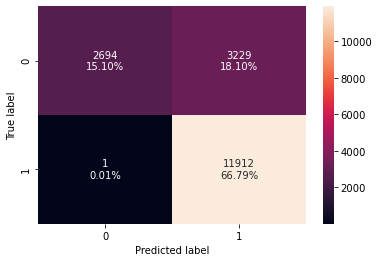

In [71]:
#confusion matrix on train data on tuned bagging classifer 
confusion(bagging_classifier_tuned, X_train, y_train)

In [72]:
#performance of tuned classifier on training set
bagging_class_tuned_perf_train = mpcsl(bagging_classifier_tuned, X_train, y_train)
print("Training set performance: \n", bagging_class_tuned_perf_train)

Training set performance: 
    Accuracy    Recall  Precision        F1
0  0.818906  0.999916   0.786738  0.880609


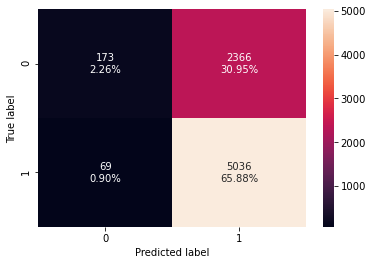

In [73]:
#confusion matrix on test data on tuned bagging classifer 
confusion(bagging_classifier_tuned, X_test, y_test)

In [74]:
#performance of tuned classifier on test set
bagging_class_tuned_perf_test = mpcsl(bagging_classifier_tuned, X_test, y_test)
print("Test set performance: \n", bagging_class_tuned_perf_test)

Test set performance: 
    Accuracy    Recall  Precision        F1
0   0.68145  0.986484   0.680357  0.805309


- After tuning, the performance of the bagging classifier on the test set has improved in recall and F1 score. However, the model has performed worse in terms of accuracy and precision compared to before tuning. 
- The model is generalizing well. In regards to F1 score, the tuned bagging classifier is performing similarly on the testing data as the tuned decision tree model. 

## Random Forest

In [75]:
rf_estimator = RandomForestClassifier(class_weight="balanced", random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

#### Checking performance of the model on the training and test sets 

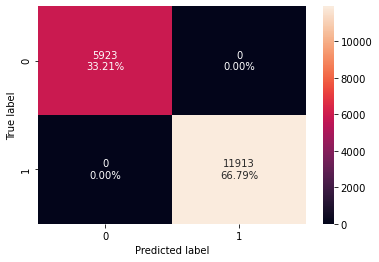

In [76]:
#confusion matrix on train data on the random forest estimator
confusion(rf_estimator, X_train, y_train)

In [77]:
#performance of random forest estimator on training set
rf_est_perf_train = mpcsl(rf_estimator, X_train, y_train)
print("Training set performance: \n", rf_est_perf_train)

Training set performance: 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


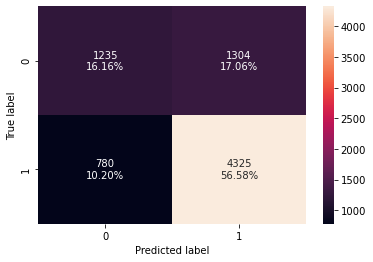

In [78]:
#confusion matrix on test data on the random forest estimator
confusion(rf_estimator, X_test, y_test)

In [79]:
#performance of random forest estimator on test set
rf_est_perf_test = mpcsl(rf_estimator, X_test, y_test)
print("Test set performance: \n", rf_est_perf_test)

Test set performance: 
    Accuracy    Recall  Precision        F1
0  0.727368  0.847209   0.768343  0.805851


- Like the previous model that have been built, random forest estimator model is very overfit to the training data. 
- The performance on the test data is not bad, but we will see below if hyperparameter tuning helps to improve some of the metrics. 

#### Hyperparameter tuning - random forest
- max depth, max features, min samples split, and n estimators

In [80]:
#choosing the type of classifier to use
rf_tuned = RandomForestClassifier(random_state = 1, oob_score=True, bootstrap=True)

#Parameters to choose from
parameters = {
    "max_depth": list(np.arange(5, 15, 5)), 
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5)}

#defining the scorer to use to compare parameters above by f1 score
acc_scorer = metrics.make_scorer(metrics.f1_score)

#running the grid search using GridSearchCV
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#setting the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

#fitting the best algorithm to the data (using the train set)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=20, oob_score=True, random_state=1)

#### Checking performance of the model on the training and test sets (after hyperparameter tuning) 

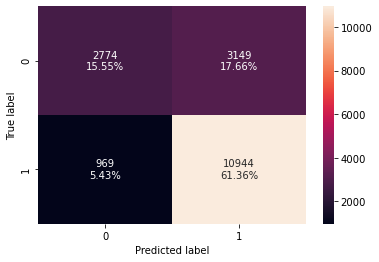

In [81]:
#confusion matrix on train data on tuned random forest model
confusion(rf_tuned, X_train, y_train)

In [82]:
#performance of tuned tree on training set
rf_tuned_perf_train = mpcsl(rf_tuned, X_train, y_train)
print("Training set performance: \n", rf_tuned_perf_train)

Training set performance: 
    Accuracy   Recall  Precision        F1
0  0.769119  0.91866   0.776556  0.841652


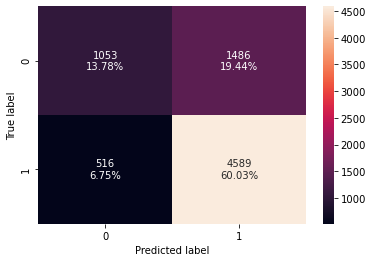

In [83]:
#confusion matrix on test data on tuned random forest model
confusion(rf_tuned, X_test, y_test)

In [84]:
#performance of tuned tree on test set
rf_tuned_perf_test = mpcsl(rf_tuned, X_test, y_test)
print("Test set performance: \n", rf_tuned_perf_test)

Test set performance: 
    Accuracy    Recall  Precision       F1
0  0.738095  0.898923   0.755391  0.82093


- After tuning, the performance of the random forest classifier on the test set has improved in accuracy, recall, and F1 score. However, the model has performed just barely worse in terms of precision compared to before tuning (by about 1%). 
- The model is generalizing well. In regards to F1 score, the tuned random forest classifier is performing slightly better on the testing data compared to both the tuned bagging classifier and the tuned decision tree model. 

# Boosting

## AdaBoost Classifier

In [85]:
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

#### Checking performance of the model on the training and test sets 

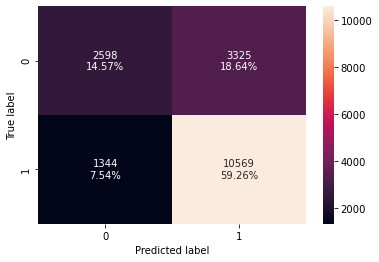

In [86]:
#confusion matrix on train data for adaboost classifier 
confusion(ab_classifier, X_train, y_train)

In [87]:
#performance of the adaboost classifier on training set
ab_perf_train = mpcsl(ab_classifier, X_train, y_train)
print("Training set performance: \n", ab_perf_train)

Training set performance: 
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


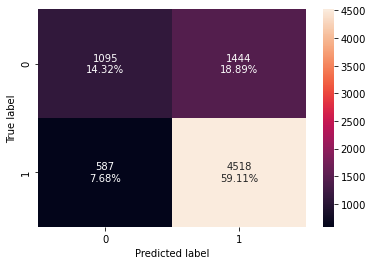

In [88]:
#confusion matrix on test data for adaboost classifier 
confusion(ab_classifier, X_test, y_test)

In [89]:
#performance of the adaboost classifier on test set
ab_perf_test = mpcsl(ab_classifier, X_test, y_test)
print("Test set performance: \n", ab_perf_test)

Test set performance: 
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


- The adaboost classifier model is performing well on both the training set and the test set. 
- The model does not appear to be overfitting the training data. 

#### Hyperparameter tuning - AdaBoost classifier
- base estimator, n estimatators, and learning rate

In [90]:
#choosing the type of classifier to use
ad_tuned = AdaBoostClassifier(random_state = 1)

#Parameters to choose from
parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1)
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": [0.1, 0.4, 0.1]}

#defining the scorer to use to compare parameters above by f1 score
acc_scorer = metrics.make_scorer(metrics.f1_score)

#running the grid search using GridSearchCV
grid_obj = GridSearchCV(ad_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#setting the clf to the best combination of parameters
ad_tuned = grid_obj.best_estimator_

#fitting the best algorithm to the data (using the train set)
ad_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking performance of the model on the training and test sets (after hyperparameter tuning) 

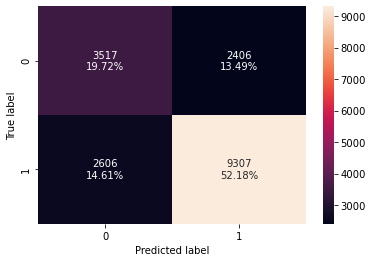

In [91]:
#confusion matrix on train data on tuned AdaBoost classifier
confusion(ad_tuned, X_train, y_train)

In [92]:
#performance of tuned adaboost classifier on training set
ad_tuned_perf_train = mpcsl(ad_tuned, X_train, y_train)
print("Training set performance: \n", ad_tuned_perf_train)

Training set performance: 
    Accuracy    Recall  Precision        F1
0  0.718995  0.781247   0.794587  0.787861


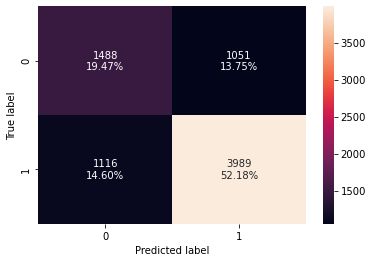

In [93]:
#confusion matrix on test data on tuned AdaBoost classifier
confusion(ad_tuned, X_test, y_test)

In [94]:
#performance of tuned tree on test set
ad_tuned_perf_test = mpcsl(ad_tuned, X_test, y_test)
print("Test set performance: \n", ad_tuned_perf_test)

Test set performance: 
    Accuracy    Recall  Precision        F1
0   0.71651  0.781391   0.791468  0.786397


- After tuning, the performance of the AdaBoost classifier on the test set has slightly worsened in accuracy, recall, and F1 score. However, the model has improved in terms of precision compared to before tuning (by about 3%).
- The model is generalizing well. In regards to F1 score, the tuned AdaBoost classifier does not seem to be performing as well on the testing data compared to the tuned random forest classifier, the tuned bagging classifier, and the tuned decision tree model.

## Gradient Boosting Classifier

In [95]:
gb_classifier = GradientBoostingClassifier(random_state = 1)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

#### Checking performance of the model on the training and test sets 

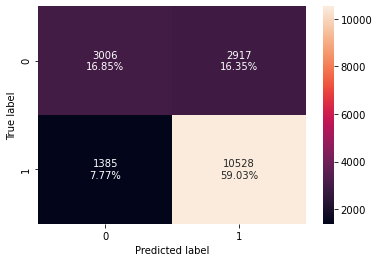

In [96]:
#confusion matrix on train data for gradient boost classifier 
confusion(gb_classifier, X_train, y_train)

In [97]:
#performance of the gradient boost classifier on training set
gb_perf_train = mpcsl(gb_classifier, X_train, y_train)
print("Training set performance: \n", gb_perf_train)

Training set performance: 
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349


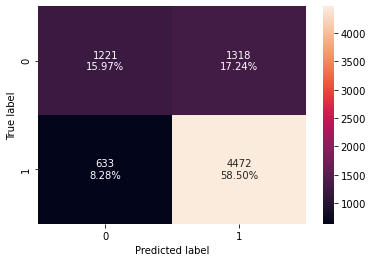

In [98]:
#confusion matrix on test data for gradient boost classifier 
confusion(gb_classifier, X_test, y_test)

In [99]:
#performance of the gradient boost classifier on test set
gb_perf_test = mpcsl(gb_classifier, X_test, y_test)
print("Test set performance: \n", gb_perf_test)

Test set performance: 
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


- The gradient boost classifier model is performing well on both the training set and the test set.
- The model does not appear to be overfitting the training data.

#### Hyperparameter tuning - GradientBoost classifier
- n estimators, subsample, max features, learning rate

In [100]:
#choosing the type of classifier to use
gb_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state = 1), random_state=1)

#Parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1)}

#defining the scorer to use to compare parameters above by f1 score
acc_scorer = metrics.make_scorer(metrics.f1_score)

#running the grid search using GridSearchCV
grid_obj = GridSearchCV(gb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#setting the clf to the best combination of parameters
gb_tuned = grid_obj.best_estimator_

#fitting the best algorithm to the data (using the train set)
gb_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=200, random_state=1,
                           subsample=1)

#### Checking performance of the model on the training and test sets (after hyperparameter tuning) 

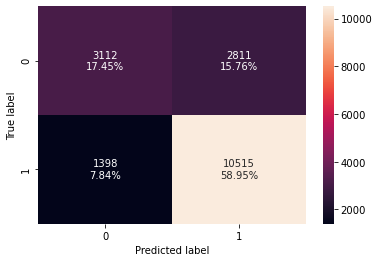

In [101]:
#confusion matrix on train data on tuned gradient boosting classifier 
confusion(gb_tuned, X_train, y_train)

In [102]:
#performance of tuned classifier on training set
gb_tuned_perf_train = mpcsl(gb_tuned, X_train, y_train)
print("Training set performance: \n", gb_tuned_perf_train)

Training set performance: 
    Accuracy    Recall  Precision        F1
0  0.764017  0.882649   0.789059  0.833234


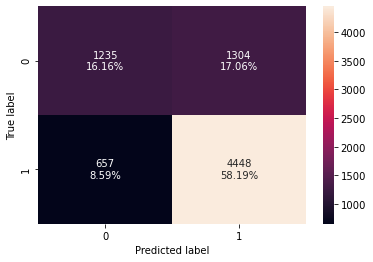

In [103]:
#confusion matrix on test data on tuned gradient boosting classifier 
confusion(gb_tuned, X_test, y_test)

In [104]:
#performance of tuned classifier on test set
gb_tuned_perf_test = mpcsl(gb_tuned, X_test, y_test)
print("Test set performance: \n", gb_tuned_perf_test)

Test set performance: 
    Accuracy    Recall  Precision        F1
0  0.743459  0.871303   0.773296  0.819379


- After tuning, the performance of the Gradient Boosting classifier on the test set has slightly worsened in accuracy, recall, and F1 score. However, the model has improved in terms of precision compared to before tuning (by less than 1%).
- The model is generalizing well. In regards to F1 score, the tuned Gradient Boosting classifier performs approximately the same as the tuned random forest classifier. The tuned GB classifier has performed slightly better than on the testing data compared to the tuned AdaBoosting classifier, the tuned bagging classifier, and the tuned decision tree model.

# XGBoost Classifier

In [105]:
xgb_classifier = XGBClassifier(random_state=1)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Checking performance of the model on the training and test sets 

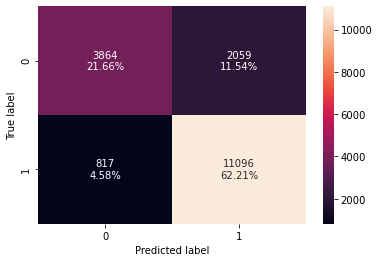

In [106]:
#confusion matrix on train data on the xgb classifier 
confusion(xgb_classifier, X_train, y_train)

In [107]:
#performance of the xgb classifier on training set
xgb_classifier_perf_train = mpcsl(xgb_classifier, X_train, y_train)
print("Training set performance: \n", xgb_classifier_perf_train)

Training set performance: 
    Accuracy    Recall  Precision        F1
0  0.838753  0.931419   0.843482  0.885272


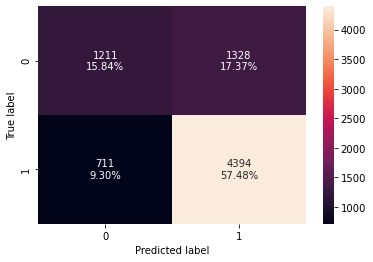

In [108]:
#confusion matrix on test data on the xgb classifier 
confusion(xgb_classifier, X_test, y_test)

In [109]:
#performance of the xgb classifier on test set
xgb_classifier_perf_test = mpcsl(xgb_classifier, X_test, y_test)
print("Test set performance: \n", xgb_classifier_perf_test)

Test set performance: 
    Accuracy    Recall  Precision        F1
0  0.733255  0.860725   0.767913  0.811675


- The XGboost classifier model is performing well on both the training set and the test set.
- The model appears to maybe be slightly overfitting the training data, but not dramatically. 

#### Hyperparameter tuning - XGBoost classifier
- similar hyperparameters to the gradient boost tuned model with the addition of scale pos weight, gamma, col sample by tree, and col sample by level. 

In [110]:
#choosing the type of classifier to use
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

#Parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [0.9, 1]}

#defining the scorer to use to compare parameters above by f1 score
acc_scorer = metrics.make_scorer(metrics.f1_score)

#running the grid search using GridSearchCV
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#setting the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

#fitting the best algorithm to the data (using the train set)
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

#### Checking performance of the model on the training and test sets (after hyperparameter tuning) 

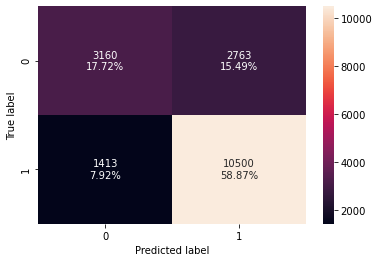

In [111]:
#confusion matrix on train data on tuned xgb model 
confusion(xgb_tuned, X_train, y_train)

In [112]:
#performance of tuned tree on training set
xgb_tuned_perf_train = mpcsl(xgb_tuned, X_train, y_train)
print("Training set performance: \n", xgb_tuned_perf_train)

Training set performance: 
    Accuracy   Recall  Precision        F1
0  0.765867  0.88139   0.791676  0.834128


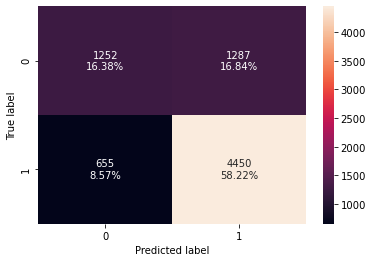

In [113]:
#confusion matrix on test data on tuned xgb model 
confusion(xgb_tuned, X_test, y_test)

In [114]:
#performance of tuned tree on test set
xgb_tuned_perf_test = mpcsl(xgb_tuned, X_test, y_test)
print("Test set performance: \n", xgb_tuned_perf_test)

Test set performance: 
    Accuracy    Recall  Precision        F1
0  0.745945  0.871694   0.775667  0.820882


- After tuning, the performance of the Gradient Boosting classifier on the test set has slightly improved in every metric: accuracy, recall, precision, and F1 score. 
- This model is also generalizing the data well. In regards to F1 score, the tuned XG Boosting classifier performs slightly better than on the testing data compared to every other model built: the tuned gradient boosting classifier, the tuned AdaBoosting classifier, tuned random forest classifier, the tuned bagging classifier, and the tuned decision tree model.

# Stacking Classifier
Building a stacking model with the tuned models - decision tree, bagging, random forest, AdaBoost, and gradient boosting. Then using XGBoost to get the final prediction. 

In [115]:
estimators = [
    ("AdaBoost", ad_tuned),
    ("Gradient Boosting", gb_tuned),
    ("Random Forest", rf_tuned),
    ("Decision Tree", dtree_tuned),
    ("Bagging", bagging_classifier_tuned)
]

final_estimator = XGBClassifier(random_state=1)

stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)
stacking_classifier.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('AdaBoost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                         max_depth=1,
                                                                                         random_state=1),
                                                   learning_rate=0.1,
                                                   n_estimators=100,
                                                   random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           n_estimators=200,
                                                           random_state=1,
                   

#### Checking performance of the model on the training and test sets 

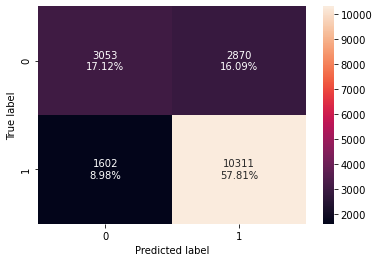

In [116]:
#confusion matrix on train data on stacking model
confusion(stacking_classifier, X_train, y_train)

In [117]:
#performance of stacked model on train set
stacked_perf_train = mpcsl(stacking_classifier, X_train, y_train)
print("Training set performance: \n", stacked_perf_train)

Training set performance: 
    Accuracy    Recall  Precision       F1
0  0.749271  0.865525   0.782262  0.82179


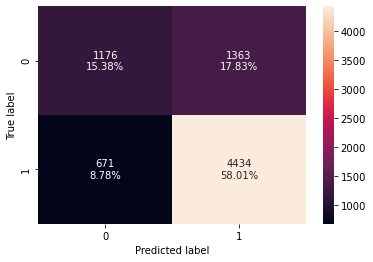

In [118]:
#confusion matrix on test data on stacking model
confusion(stacking_classifier, X_test, y_test)

In [119]:
#performance of stacked model on test set
stacked_perf_test = mpcsl(stacking_classifier, X_test, y_test)
print("Test set performance: \n", stacked_perf_test)

Test set performance: 
    Accuracy   Recall  Precision        F1
0  0.733909  0.86856   0.764878  0.813429


- The stacked model is performing similarly to the XGBoost model on the test data, according to the F1 score. 

# Model Performance Comparison and Conclusions

### Model Comparison

In [120]:
# training performance comparison

#forming a dataframe to hold the performance metrics from every model for comparison
models_train_comp_df = pd.concat([
    dtree_perf_train.T,
    dtree_tuned_perf_train.T,
    bagging_classifier_perf_train.T,
    bagging_class_tuned_perf_train.T,
    rf_est_perf_train.T,
    rf_tuned_perf_train.T,
    ab_perf_train.T,
    ad_tuned_perf_train.T,
    gb_perf_train.T,
    gb_tuned_perf_train.T,
    xgb_classifier_perf_train.T,
    xgb_tuned_perf_train.T,
    stacked_perf_train.T], axis=1) 
     
# defining column names
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.985198,0.818906,1.0,0.769119,0.738226,0.718995,0.758802,0.764017,0.838753,0.765867,0.749271
Recall,1.0,0.931923,0.985982,0.999916,1.0,0.918660,0.887182,0.781247,0.883740,0.882649,0.931419,0.881390,0.865525
Precision,1.0,0.720067,0.991810,0.786738,1.0,0.776556,0.760688,0.794587,0.783042,0.789059,0.843482,0.791676,0.782262
F1,1.0,0.812411,0.988887,0.880609,1.0,0.841652,0.819080,0.787861,0.830349,0.833234,0.885272,0.834128,0.821790


In [121]:
# testing performance comparison

#forming a dataframe to hold the performance metrics from every model for comparison
models_test_comp_df = pd.concat([
    dtree_perf_test.T,
    dtree_tuned_perf_test.T,
    bagging_classifier_perf_test.T,
    bagging_class_tuned_perf_test.T,
    rf_est_perf_test.T,
    rf_tuned_perf_test.T,
    ab_perf_test.T,
    ad_tuned_perf_test.T,
    gb_perf_test.T,
    gb_tuned_perf_test.T,
    xgb_classifier_perf_test.T,
    xgb_tuned_perf_test.T,
    stacked_perf_test.T], axis=1) 
     
# defining column names
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.660518,0.706567,0.691523,0.681450,0.727368,0.738095,0.734301,0.716510,0.744767,0.743459,0.733255,0.745945,0.733909
Recall,0.739471,0.930852,0.764153,0.986484,0.847209,0.898923,0.885015,0.781391,0.876004,0.871303,0.860725,0.871694,0.868560
Precision,0.749008,0.715447,0.771711,0.680357,0.768343,0.755391,0.757799,0.791468,0.772366,0.773296,0.767913,0.775667,0.764878
F1,0.744209,0.809058,0.767913,0.805309,0.805851,0.820930,0.816481,0.786397,0.820927,0.819379,0.811675,0.820882,0.813429


- Overall, the gradient boost classifier model (without tuning) produces the highest F1 score and will be used as the final model. 
- The gradient boost classifier has the highest F1 score (0.820927), the 2nd highest Accuracy score (at 0.744767), a very high Recall score, and a very high precision score when compared to every other model. 
- Gradient Boost, XG Boost, and Tuned Random Forest are the top 3 models and are all giving similar performances on the test data. 

## Final Model - Feature importances (Gradient Boost Classifier)

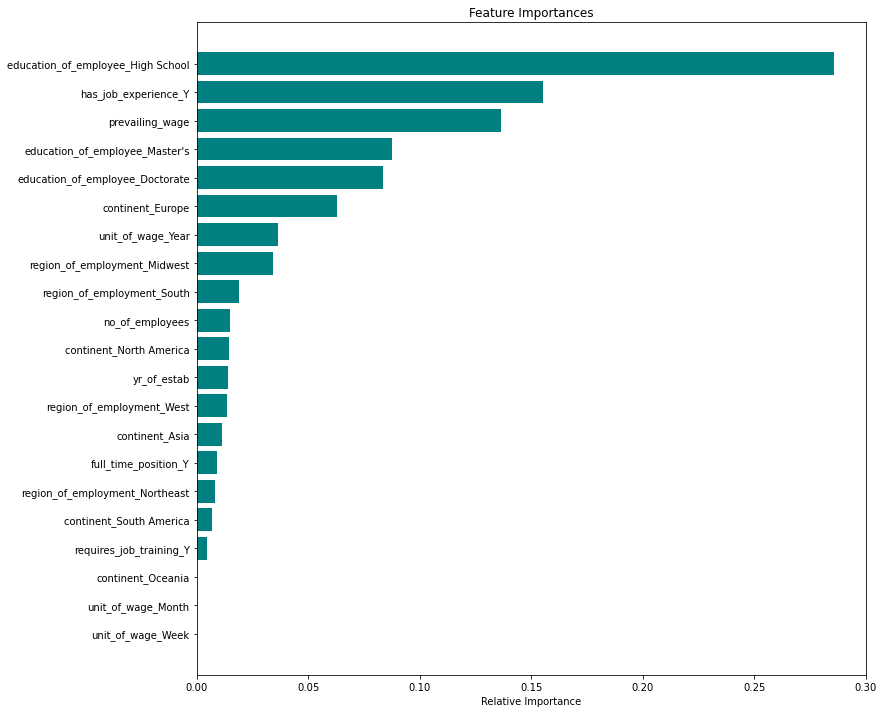

In [122]:
# feature importances of the final model 
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

#plotting the importances to visualize them
plt.figure(figsize=(12,12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="teal", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- For prediction, the education level of the employee (if a high school education is their maximum) is the most important feature within this model. 
- This is closely followed by if the employee does in fact have job experience, and the overall prevailing wage of the position. 

# Actionable Insights and Recommendations

1. The Gradient Boost Model can be used to predict if a visa for that employee will be approved (certified) or denies based on some factors. The model has an F1 score of 80.09%, which can be interpreted as a weighted average of precision and recall. 
    - A high F1 score indicates lower chances of false negative results and false positive results. 
    - For this data, this means that there are lower chances of visas that should have been certified were denied (and the US would miss out on a valuable employee). This also means there is a lower likelihood that a visa will be certified when it should have actually been denied. Both of which are important to limit as much as possible. 
2. The model proves our observation that education level plays an important role on the outcome of a visa application. Out of the employees in the dataset that had only a high school education, only 1/3 were approved (certified) for visas. This ratio continues to increase as education level continues to increase. Having more than a high school education makes an employee more and more likely to be certified for their visa. 
3. A similar trend is seen with previous job experience. Employees in the dataset that are listed to have job experience are more commonly certified for visas compared to employees without previous job experience. 
4. Given this information, the first aspect of an application that should be looked at is education level. Employees with higher levels of education are more likely to fit the criteria for visa approvals than employees with a high school diploma or less. 
5. From the relative importances graph, we also learn some insight about the importances of the company themselves. The company size and year of establishment both do not play an important role on the likelihood of a visa being approved or not. Therefore, the name and age of the company does not need to be looked at to help determine if an application should move forward or not. 